# <span style="color:green">Pandas for Machine Learning</span>
![Pandas](https://camo.githubusercontent.com/734df9f67a968b3123fd9f27bad69490f3f937a9adc30bc6a48809bf8f6fa067/68747470733a2f2f686970732e686561727374617070732e636f6d2f656c6c65756b2e63646e64732e6e65742f31362f33362f3332303078313539392f67616c6c6572792d313437333038333537332d70616e6461732e6a7067)
- from [Made With ML](https://madewithml.com/courses/foundations/pandas/)
- [비즈니스 데이터 분석 with Python](https://wikidocs.net/book/9257) 위키독스 자료를 참고하세요.

## <span style="color:green">1. 소개</span>
**Pandas는 Python에서 강력한 데이터 조작 라이브러리입니다**. DataFrame과 같은 데이터 구조를 제공하여 머신 러닝에서 자주 사용하는 표 형식 데이터를 처리하기에 이상적입니다.  
[pandas]는 동일한 개인에 대해 여러 기간에 걸쳐 관찰한 데이터를 포함하는 데이터 세트를 나타내는 경제학 용어인 "패널 데이터(panel data)"에서 유래되었습니다. — 위키백과

## <span style="color:green">2. 왜 Pandas를 사용해야 하나요?</span>
- <span style="color:orange">**사용 용이성**</span>: Pandas는 직관적이고 유연한 데이터 구조를 제공합니다.
- <span style="color:orange">**데이터 정리**</span>: 누락된 데이터를 효율적으로 처리하고 정리 작업을 수행합니다.
- <span style="color:orange">**데이터 분석**</span>: 복잡한 집계 (aggregation)및 변환 (transformation)을 쉽게 수행할 수 있습니다.
- <span style="color:orange">**통합성**</span>: NumPy, SciPy, Scikit-Learn과 같은 다른 Python 라이브러리와 잘 작동합니다.

## <span style="color:green">3. 주요 기능</span>
- <span style="color:orange">**DataFrames**</span>: 2차원, 크기 가변적, 다양한 유형의 데이터가 포함될 수 있는 표 형식 데이터.
- <span style="color:orange">**Series**</span>: 값의 시퀀스를 포함하는 1차원 배열과 유사한 객체.
- <span style="color:orange">**누락된 데이터 처리**</span>: 누락된 데이터를 매끄럽게 처리하는 도구.
- <span style="color:orange">**병합 (merging) 및 결합 (joining)**</span>: 여러 DataFrame의 데이터를 결합할 수 있습니다.


## <span style="color:green">4. Pandas를 사용한 데이터 조작</span>

#### **Core components of pandas:  Series and DataFrames**
- The primary two components of pandas are the *Series* and *DataFrame*.- 
*A Seri*es is essentially a column, and *a DataFra*me is a multi-dimensional table made up of a collection o*f Seri*es



![데이터구조](https://wikidocs.net/images/page/205241/pandas1.png)

---
### **Set up**

먼저 NumPy와 Pandas 라이브러리를 불러오고, 재현성을 위해 시드 값을 설정하겠습니다. 또한 작업할 데이터셋을 디스크에 다운로드하겠습니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Pandas 버전 확인
pd.__version__

'1.5.0'

In [3]:
# pandas 패키지의 업그레이드 
# !pip install --upgrade pandas

In [4]:
# Set seed for reproducibility
# 난수 생성의 재현 가능성을 보장하기 위해서입니다. 이 코드는 numpy 라이브러리의 난수 생성기에 초기값(seed)을 설정하여 동일한 난수 시퀀스를 생성할 수 있도록 합니다. 이를 통해 코드의 결과를 일관되게 재현할 수 있습니다.
np.random.seed(seed=1234)

---
### **Load Data**

우리는 1912년에 RMS 타이타닉호에 탑승한 사람들의 데이터와 그들이 생존했는지 여부에 대한 데이터를 포함하는 타이타닉 데이터셋을 사용할 것입니다. 이 데이터셋은 매우 일반적이고 풍부하여 Pandas를 사용한 탐색적 데이터 분석에 매우 적합합니다.

CSV 파일에서 데이터를 Pandas 데이터프레임으로 불러오겠습니다. header=0은 첫 번째 행(0번째 인덱스)이 데이터셋의 각 열 이름을 포함하는 헤더 행임을 나타냅니다.

In [5]:
# Read from CSV to Pandas DataFrame
url = "https://github.com/datasciencedojo/datasets/raw/master/titanic.csv"
df = pd.read_csv(url, header=0)

In [6]:
# First few items
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


이들은 서로 다른 특징(Feature)들입니다:

- Survived: 생존 여부 지표 (0 - 사망, 1 - 생존)
- Pclass: 티켓 클래스, 1=1st, 2=2nd, 3=3rd
- Name: 승객 이름
- Sex: 성별
- Age: 나이(숫자)
- SibSp: 탑승한 형제/배우자의 수
- Parch: 탑승한 부모/자녀의 수
- Ticket: 티켓 번호
- Fare: 티켓 비용
- Cabin: 객실 위치
- Embarked: 승객이 탑승한 항구, C=Cherbourg, Q=Queenstown, S=Southampton - survived)

In [7]:
# df의 첫 5개 줄 표시



In [8]:
# df의 마지막 5개 줄 표시



In [9]:
# 데이터의 차원 확인 (행의 수, 열의 수)
df.shape

(891, 12)

In [10]:
# 각 열의 데이터 타입 확인
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# 열 이름 확인
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# 하나의 열 선택
df["Survived"]  #or df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# Pclass 열 선택



In [14]:
# 다수의 열 선택, 여러 열을 선택할 때는 항상 '[]'를 사용
df[["Survived", "Pclass", "Name"]]

,Survived,Pclass,Name
0,0,3,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
...,...,...,...
886,0,2,"Montvila, Rev. Juozas"
887,1,1,"Graham, Miss. Margaret Edith"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,"Behr, Mr. Karl Howell"


In [15]:
# df의 'Parch', 'Ticket', 'Fare', 열에 대한 데이터 타입은?




In [16]:
# 행 선택
df[0:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Pandas에서는 '[]' 안에서 행과 열을 동시에 슬라이싱할 수 없다.** 행과 열을 동시에 선택하려면 df.loc[] 또는 df.iloc[]을 사용해야 합니다.

In [17]:
# 처음 10행과 'Name', 'Sex', 'Age' 만 선택
df[0:11, ['Name','Sex','Age']]

InvalidIndexError: (slice(0, 11, None), ['Name', 'Sex', 'Age'])

---
### **Exploratory data analysis (EDA)**

이제 데이터를 불러왔으니, 흥미로운 정보를 찾기 위해 탐색을 시작할 준비가 되었습니다.


In [18]:
import matplotlib.pyplot as plt

숫자형 특징들에 대한 표준 세부 정보를 추출하기 위해 .describe()를 사용할 수 있습니다.

In [19]:
# Describe features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


각 통계량의 의미는 다음과 같습니다:
- count: 각 열에 대한 값의 개수입니다. 결측값(NaN)은 제외됩니다.
- mean: 각 열의 평균 값입니다.
- std: 각 열의 표준편차입니다. 이는 데이터 값이 평균으로부터 얼마나 떨어져 있는지를 나타냅니다.
- min: 각 열의 최솟값입니다.
- 25% (1사분위수): 각 열의 값 중 하위 25%에 해당하는 값입니다. 이는 데이터의 25%가 이 값 이하임을 의미합니다.
- 50% (중앙값, 2사분위수): 각 열의 값 중 하위 50%에 해당하는 값입니다. 이는 중앙값을 나타내며, 데이터의 중간에 위치한 값입니다.
- 75% (3사분위수): 각 열의 값 중 하위 75%에 해당하는 값입니다. 이는 데이터의 75%가 이 값 이하임을 의미합니다.
- max: 각 열의 최댓값입니다.

In [20]:
# Describe features excluding "PassengerId"
df.describe().drop(columns=['PassengerId'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


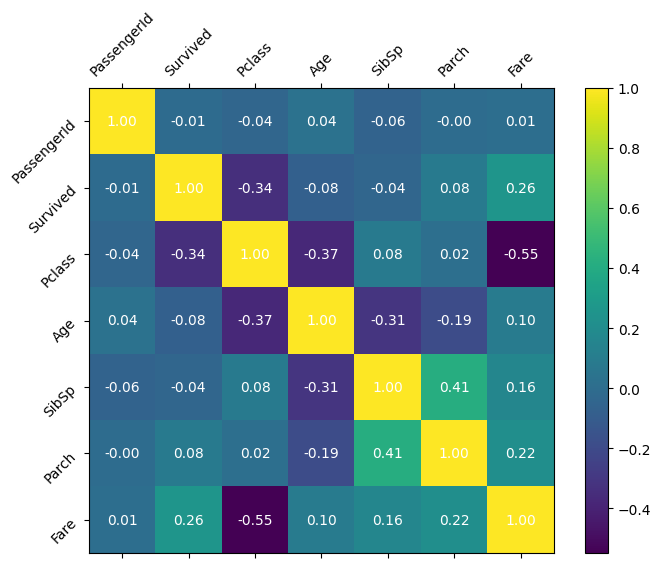

In [21]:
# 수치형 열만 선택
# 'include=['float64', 'int64']'는 float64와 int64 타입의 열만 포함하도록 지정합니다.
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 상관행렬 계산
# 'numerical_df.corr()'는 수치형 열들 간의 상관관계를 계산하여 행렬 형태로 반환합니다.
corr_matrix = numerical_df.corr()

# 'plt.figure(figsize=(8, 6))' 가로 8인치, 세로 6인치 크기의 figure 객체를 생성
# 'plt.matshow()'는 행렬을 시각화하는 함수로, 상관관계 행렬을 색상으로 표현합니다.
plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, fignum=1)   # fignum=1은 새로운 창을 만들지 않고 기존 창에 그래프를 그림

# 수치형 특성의 열 이름 가져오기
continuous_features = numerical_df.columns

# x축과 y축의 틱 레이블 설정
# 'range(len(continuous_features))'는 각 열의 인덱스를 나타냅니다.
# 'continuous_features'는 각 열의 이름을 레이블로 사용합니다.
# 'rotation=45'는 레이블을 45도 회전시켜 가독성을 높입니다.
plt.xticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.yticks(range(len(continuous_features)), continuous_features, rotation=45)

# 상관계수를 그래프에 표시
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

# 색상 막대 추가
plt.colorbar()

# 그래프 표시
plt.show()

또한 .hist()를 사용하여 각 특징의 값에 대한 히스토그램을 볼 수 있습니다.

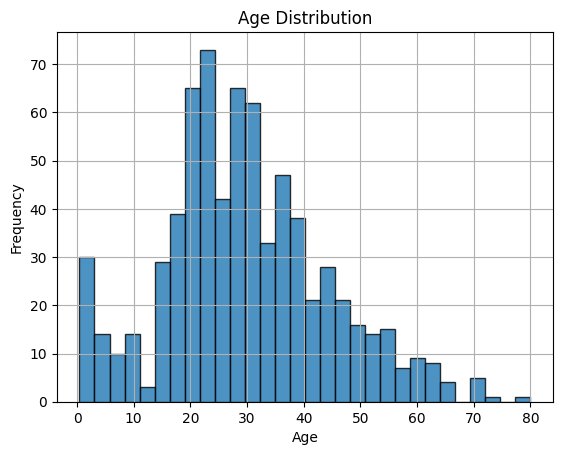

In [22]:
# Histograms
# 기본 라이브러리: Matplotlib
df["Age"].hist(bins=30, edgecolor='black', alpha=0.8)     #alpha: 0에 가까울수록 완전히 투명하고, 1에 가까울수록 불투명
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

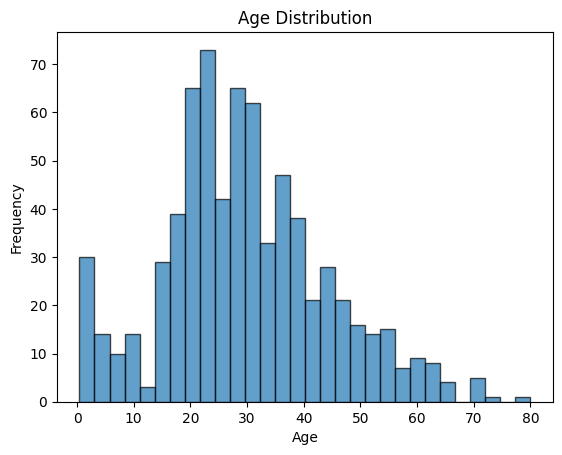

In [23]:
# 나이(Age) 분포 히스토그램
# 기본 라이브러리: Matplotlib
# 'kind' 인자: line, bar, barh, hist, box, kde (커널 밀도 추정 플롯), area, pie
df['Age'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

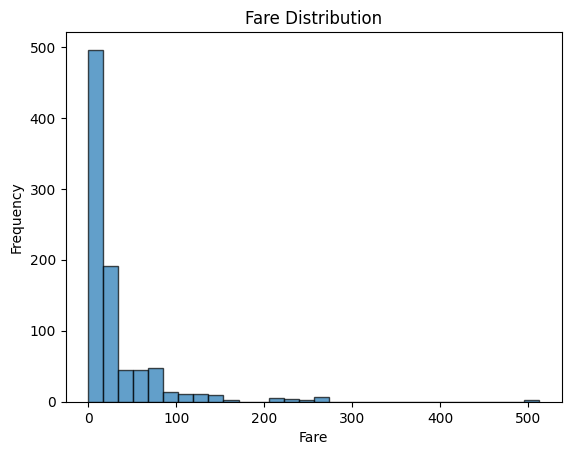

In [24]:
# 요금(Fare) 분포 히스토그램
df['Fare'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

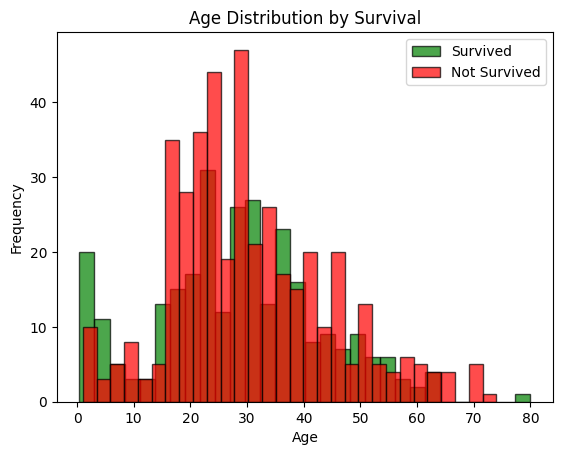

In [25]:
# 생존 여부(Survived)에 따른 나이 분포 비교 히스토그램
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, color='green', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [26]:
# Unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
# #Unique values
df["Embarked"].nunique()

3

In [28]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
19.00    25
         ..
66.00     1
0.92      1
23.50     1
53.00     1
80.00     1
Name: Age, Length: 88, dtype: int64

In [29]:
df.Age.mean()

29.69911764705882

In [30]:
# 티켓 비용 (Fare)의 평균 값은 ?




In [31]:
df.Age.median()

28.0

In [32]:
df.Age.max()

80.0

In [33]:
# 가장 비싼 티켓 비용 (Fare)은 ?




---
### **Filtering**

특징별로 데이터를 필터링하거나 특정 특징 내의 특정 값(또는 값 범위)으로 데이터를 필터링할 수도 있습니다.

In [34]:
# Selecting data by feature
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

A **Boolean mask** is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

In [35]:
df["Sex"]=="female"

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [36]:
# Filtering
df[df["Sex"]=="female"].head() # only the female data appear

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
# Important: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (&, |, ~) instead of logical operators (and, or, not).
(df["Sex"]=="female") & (df["Age"] > 30)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [38]:
df[(df["Sex"]=="female") & (df["Age"] > 30)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [39]:
# 1등석에 탑승한 여자 승객들의 평균 티겟 비용은? "." 방법



In [40]:
# [] 방법


---
### **Sorting**

특징들을 오름차순 또는 내림차순으로 정렬할 수도 있습니다.

In [41]:
# Sorting
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


---
### **Grouping**

특정 그룹에 대해 특징별 통계를 얻을 수도 있습니다. 여기서는 승객이 생존했는지 여부에 따라 연속형 특징들의 평균을 확인하려고 합니다.

In [42]:
# Grouping
survived_group = df.groupby("Survived")
survived_group.mean()

/tmp/ipykernel_3590/3433218732.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_group.mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [43]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns.drop(['Survived', 'PassengerId'])
## or selected_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Survived', 'PassengerId'])


# Grouping by "Survived" and calculating mean for numerical columns
survived_group = df.groupby("Survived")[selected_columns]
survived_group.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


---
### **Indexing**

iloc를 사용하여 데이터프레임에서 특정 위치에 있는 행이나 열을 가져올 수 있습니다.

In [44]:
# Selecting row 0
df.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [45]:
# Selecting a specific value
df.iloc[0, 3]

'Braund, Mr. Owen Harris'

In [46]:
# 다수의 행과 열 선택
df.iloc[0:3, [0,3,4,5]]

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0


In [47]:
# 이름으로 선택하기위해 loc[] 사용, 연속된 열 선택
df.loc[100:104, 'Name':'Ticket']

,Name,Sex,Age,SibSp,Parch,Ticket
100,"Petranec, Miss. Matilda",female,28.0,0,0,349245
101,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215
102,"White, Mr. Richard Frasar",male,21.0,0,1,35281
103,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540
104,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276


In [48]:
# 비연속적인 여러 열 선택
df.loc[100:104, ['Name', 'Sex', 'Age']]

,Name,Sex,Age
100,"Petranec, Miss. Matilda",female,28.0
101,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN
102,"White, Mr. Richard Frasar",male,21.0
103,"Johansson, Mr. Gustaf Joel",male,33.0
104,"Gustafsson, Mr. Anders Vilhelm",male,37.0


In [49]:
# 마지막 5개 행의 Name, SibSp, Parch 열을 선택하시오, tail 메서드 활용



---
### **Preprocessing**

탐색 후에는 데이터셋을 정리하고 전처리할 수 있습니다.

In [50]:
# Rows with at least one NaN value
# axis=0, 특정 행; axis=1, 특정 열
df[pd.isnull(df).any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [51]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [52]:
# Dropping multiple columns
df = df.drop(["Name", "Cabin", "Ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [53]:
# Map feature values
df["Sex"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)
df["Embarked"] = df["Embarked"].dropna().map( {"S":0, "C":1, "Q":2} ).astype(int)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,38.0,1,0,71.2833,1
1,3,4,1,1,0,35.0,1,0,53.1000,0
2,6,7,0,1,1,54.0,0,0,51.8625,0
3,10,11,1,3,0,4.0,1,1,16.7000,0
4,11,12,1,1,0,58.0,0,0,26.5500,0


---
### **Feature engineering**

이제 특성 공학을 사용하여 family_size라는 열을 만들겠습니다. 먼저 부모와 형제의 수를 사용하여 가족 크기를 결정하는 get_family_size라는 함수를 정의하겠습니다.

In [54]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

함수를 정의한 후, 각 행에 있는 형제와 부모의 수를 사용하여 각 행의 가족 크기를 결정하는 함수를 람다를 사용하여 적용할 수 있습니다.

In [55]:
df["Family_size"] = df[["SibSp", "Parch"]].apply(lambda row: get_family_size(row["SibSp"], row["Parch"]), axis=1)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0


- 'df'라는 데이터프레임에 새로운 열 'Family_size'를 추가합니다.
- 'apply' 메소드를 사용하여 'SibSp'와 'Parch' 열에 대해 'get_family_size' 함수를 적용합니다.
- 'apply' 메소드 내에서 'lambda' 함수를 사용하여 각 행에 대해 'get_family_size' 함수를 호출합니다.
- 'x'는 'SibSp'와 'Parch' 열을 포함하는 각 행을 나타냅니다.
- 'x["SibSp"]'와 'x["Parch"]'를 'get_family_size' 함수에 전달하여 가족 크기를 계산합니다.
- 'axis=1'은 행 단위로 함수를 적용하도록 지정합니다.

In [56]:
# 더 쉬운 방법
df["Family_size2"] = df.SibSp + df.Parch
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Family_size2
0,1,2,1,1,0,38.0,1,0,71.2833,1,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0,0


In [57]:
are_columns_equal = (df['Family_size'] == df['Family_size2']).all()
print(f"Family_size과 Family_size2가 동일한가요? {are_columns_equal}")

Family_size과 Family_size2가 동일한가요? True


In [58]:
df = df.drop('Family_size2', axis=1)

In [59]:
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0


In [60]:
# Reorganize headers
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Family_size", "Fare", "Embarked", "Survived"]]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Family_size,Fare,Embarked,Survived
0,1,0,38.0,1,0,1,71.2833,1,1
1,1,0,35.0,1,0,1,53.1000,0,1
2,1,1,54.0,0,0,0,51.8625,0,0
3,3,0,4.0,1,1,2,16.7000,0,1
4,1,0,58.0,0,0,0,26.5500,0,1


---
### **Save data**

마지막으로, 나중에 사용하기 위해 전처리된 데이터를 새로운 CSV 파일로 저장하겠습니다.

In [61]:
# Saving dataframe to CSV
df.to_csv("processed_titanic.csv", index=False)

In [62]:
# Saving dataframe to Excel
df.to_excel("processed_titanic.xlsx", sheet_name="Sheet1", index=False)

In [63]:
# See the saved file
!ls -l

total 6744
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users  621345 Jul 16 02:28 Jump2Python_02.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users   55622 Jul 16 02:28 Jump2Python_03_JY.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users 1348790 Jul 16 02:28 Jump2Python_04-AY.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users   34612 Jul 16 02:28 Jump2Python_05_bm.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users   53107 Jul 16 02:28 Jump2Python_05_hi.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users   35519 Jul 16 02:28 Jump2Python_1.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users  339514 Jul 16 02:28 ML_introduction.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users 1159686 Jul 17 04:37 ML_pandas_intro1.ipynb
-rw-rw-r-- 1 b6534a13-b8fd-48d7-a484-8f89c73c73c6 registered_users  122847 Jul 17 02:43 ML_pandas_intro

---
### **Scaling**

아주 큰 데이터셋을 다룰 때 Pandas DataFrame이 매우 커질 수 있으며, 이로 인해 작업 속도가 느려지거나 불가능할 수 있습니다. 이때 작업을 분산하거나 더 효율적인 하드웨어에서 실행할 수 있는 패키지가 유용할 수 있습니다.

- [
Da](https://dask.org/)sk병렬 컴퓨팅을 통해 Numpy, Pandas 및 scikit-learn과 같은 패키지를 하나 또는 여러 대의 머신에서 확장할 수 있습니다.
- [cuDF](https://github.com/rapidsai/cudf): GPU에서 효율적으로 데이터프레임을 로드하고 계산할 수 있습니다.

물론, 이를 함께 결합하여 ([Dask-cuDF](https://github.com/rapidsai/cudf/tree/main/python/dask_cudf)) GPU에서 데이터프레임의 파티션에 대해 작업할 수도 있습니다.
 GPU.

---

## <a href="https://github.com/tlint101/py50" style="color:green">5. Generate Dose-Response Curves</a>

The dose-response curves are built on the four parameter logistic regression model:
$$Y = \text{Min} + \frac{\text{Max} - \text{Min}}{1 + \left(\frac{X}{\text{IC50}}\right)^{\text{Hill coefficient}}}$$
where min is the minimum response value, max is the maximum response value, Y is the response values of the curves, X
is the concentration.

In [64]:
# py50 패키지 설치
#! pip install py50

### py50 Quickstart

The following details how to get up and running using py50. These funcitons take in simple parameters to plot the dose-response curves. There are three plotting options - Single Curve, Multi Curve, and Grid Plot.

In [65]:
from py50.calculator import Calculator
from py50.plotcurve import PlotCurve
from py50.plot_settings import CBMARKERS, CBPALETTE
# CBMARKERS: Matplotlib markers
# CBPALETTE: Color-blind safe palette

### Calculate Relative and Absolute IC50

In [66]:
# Read in dataset
example = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/single_example.csv')

calc_data = Calculator(example)  # Instantiate dataframe into the Calculator class 
calc_data.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


In [67]:
# Perform calculation
# If only relative IC50 needed, can use the calc_data.calculate_ic50() function instead.
calculation = calc_data.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                                response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.854406,-7.640227,439.824225,584.734002,1.040878


In [68]:
# Perform calculation
# If only relative IC50 needed, can use the calc_data.calculate_ic50() function instead.
calculation = calc_data.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                                response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854406,-7.640227,439.824225,1.040878


### Scale results to pIC50

If IC50 is not your cup of tea, you can quickly scale the values into pIC50 values. This is done using the calculate_pic50() function. It will calculate absolute IC50, but will append two additional columns for hte relative pIC50 and absolute pIC50.

In [69]:
calculation = calc_data.calculate_pic50(name_col='Compound Name', concentration_col='Compound Conc',
                                        response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope,relative pIC50,absolute pIC50
0,Drug 1,92.854406,-7.640227,439.824225,584.734002,1.040878,6.356721,6.233042


### Single Curve


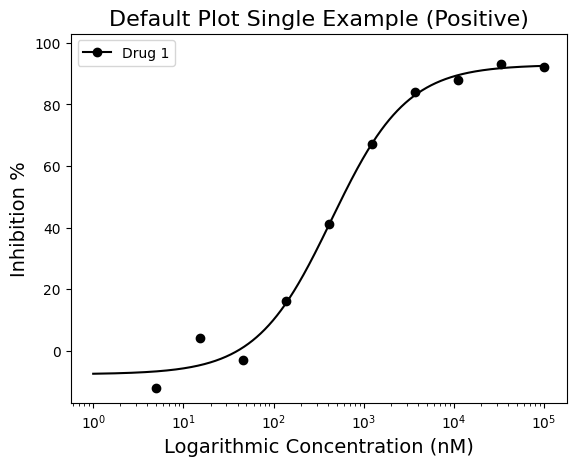

In [70]:
single = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/single_example.csv')
plot_data = PlotCurve(single)

figure1 = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Positive)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True)

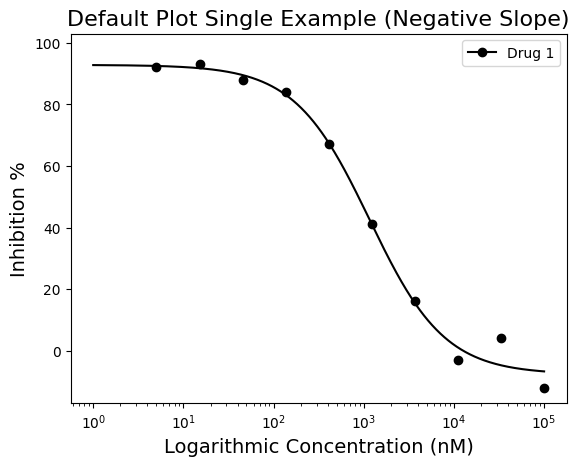

In [71]:
single_negative = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/single_example_negative.csv')
plot_data = PlotCurve(single_negative)
figure2 = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Negative Slope)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True)

### Multi-Curve

In [72]:
# Read in Dataset
multi = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/multiple_example.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

#Optional to inspect table
plot_data.show(rows=20)

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92.0
1,Drug 1,33300.0,97,89,93.0
2,Drug 1,11100.0,86,89,87.5
3,Drug 1,3700.0,81,88,84.5
4,Drug 1,1240.0,63,70,66.5
5,Drug 1,412.0,36,47,41.5
6,Drug 1,137.0,22,11,16.5
7,Drug 1,45.7,-4,-3,-3.5
8,Drug 1,15.2,11,-3,4.0
9,Drug 1,5.0,-14,-11,-12.5


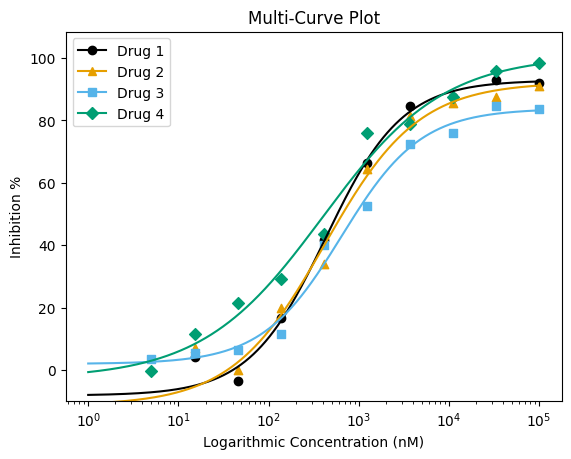

In [73]:
figure3 = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS,
                                    ymin=-10)

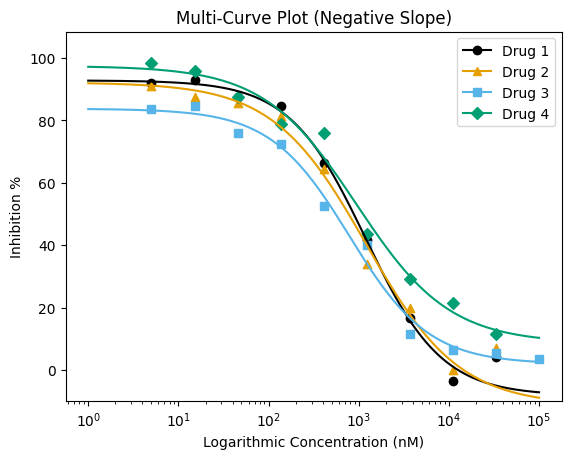

In [74]:
# For negative slope
# Read in Dataset
multi = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/multiple_example_negative.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

figure4 = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot (Negative Slope)',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS,
                                    ymin=-10)

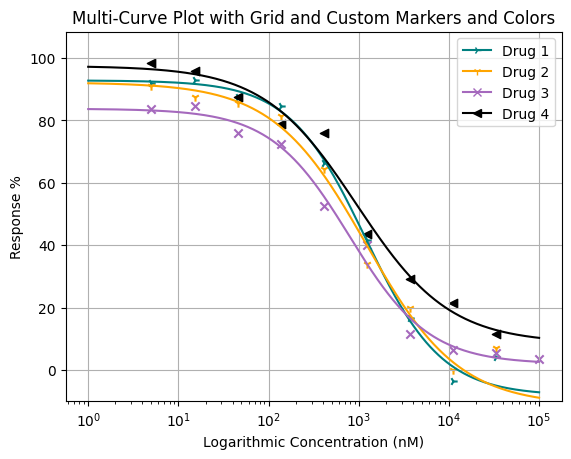

In [75]:
figure5 = plot_data.multi_curve_plot(name_col='Compound Name',
                               concentration_col='Compound Conc',
                               response_col='% Inhibition Avg',
                               plot_title='Multi-Curve Plot with Grid and Custom Markers and Colors',
                               xlabel='Logarithmic Concentration (nM)',
                               ylabel='Response %',
                               legend=True,
                               line_color=['#008080', 'orange', '#A569BD', 'black'],
                               marker=['4', '1', 'x', '<'],
                               grid=True,
                               ymin=-10)

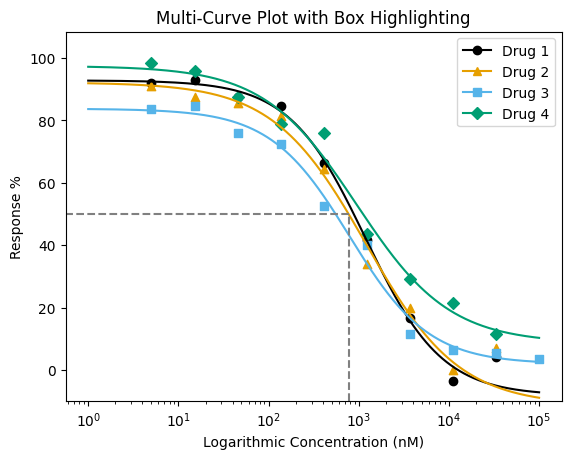

In [76]:
# 특정 약물의 절대 IC50(Absolute IC50)을 강조할 수 있습니다. 이를 통해 다른 곡선들의 IC50을 빠르게 평가할 수 있습니다.
# 기본적으로 상자는 절대 IC50 값을 강조합니다. 그러나 필요할 경우 "box_intercept=" 인수를 사용하여 수정할 수도 있습니다.
figure6 = plot_data.multi_curve_plot(name_col='Compound Name',
                               concentration_col='Compound Conc',
                               response_col='% Inhibition Avg',
                               plot_title='Multi-Curve Plot with Box Highlighting',
                               xlabel='Logarithmic Concentration (nM)',
                               ylabel='Response %',
                               legend=True,
                               box_target='Drug 2',
                               ymin=-10)

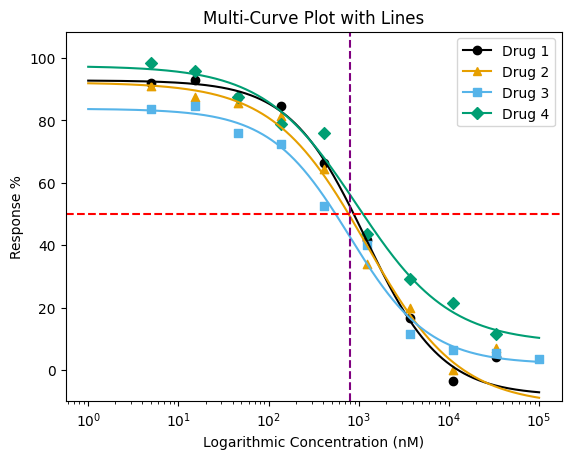

In [77]:
figure7 = plot_data.multi_curve_plot(name_col='Compound Name',
                               concentration_col='Compound Conc',
                               response_col='% Inhibition Avg',
                               plot_title='Multi-Curve Plot with Lines',
                               xlabel='Logarithmic Concentration (nM)',
                               ylabel='Response %',
                               legend=True,
                               hline=50,
                               hline_color='red',
                               vline=800,
                               vline_color='purple',
                               ymin=-10)

### Grid Plot

In [78]:
# Read in Dataset
grid = pd.read_csv('https://github.com/tlint101/py50/raw/main/dataset/multiple_example.csv')

# Instantiate dataframe into the PlotCurve class 
grid_plot = PlotCurve(grid)

# Optional to inspect table
grid_plot.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92.0
1,Drug 1,33300.0,97,89,93.0
2,Drug 1,11100.0,86,89,87.5
3,Drug 1,3700.0,81,88,84.5
4,Drug 1,1240.0,63,70,66.5


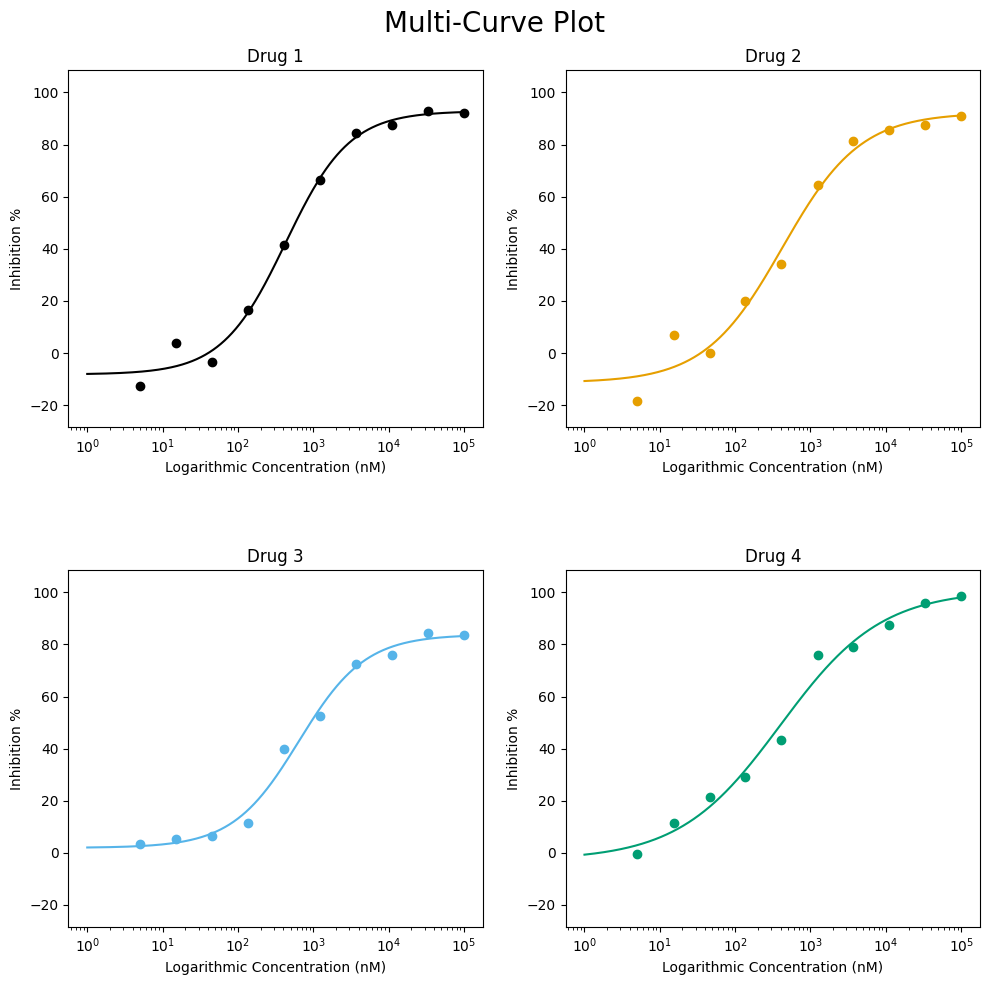

In [79]:
figure8 = grid_plot.grid_curve_plot(name_col='Compound Name',
                                   concentration_col='Compound Conc',
                                   response_col='% Inhibition Avg',
                                   plot_title='Multi-Curve Plot',
                                   xlabel='Logarithmic Concentration (nM)',
                                   ylabel='Inhibition %',
                                   conc_unit='nM',
                                   figsize=(10, 10))

What does Relative vs. Absolute mean? GraphPad has a post explaining this problem: [Relative vs. Absolute IC50](https://www.graphpad.com/support/faq/relative-vs-absolute-ic50/) and [50% of what? How exactly are Ic50 and EC50 defined?](https://www.graphpad.com/support/faqid/1356/)er below.

![graphpad_absolute.png](https://tlint101.github.io/practice-in-code/posts/img/graphpad_absolute.png)  
Image from GraphPad KNOWLEDGEBASE - ARTICLE #1566 ([here](https://www.graphpad.com/support/faq/relative-vs-absolute-ic50/))

In short, **Relative IC50 is the concentration that brings the curve down to the point halfway between the top and the bottom plateaus of the curve.** ***This is the most common definition for IC50.*** When anyone says my drug has an IC50 of X value, it is safe to assume that they mean relative IC50. The problem is that the relative IC50 may not correlate to exactly 50% response (Figure above).

In contrast, **Absolute IC50 is the value at the exact point where the target response is 50%.** The figure above details this point with the horizontal lines. Keep in mind that depending on the dataset and results, the 50% mark can also be ambiguous. It may be best to use absolute IC50 values if the response can be properly converted to a percentage (0% - 100%). However, how this is done can differ between methods and assays.

In this tutorial, we will not be too concerted with these aspects. Instead, we will focus on “weird” results that may result from the Relative vs Absolute IC50 calculation. Sometimes these results are due to limited datapoints (i.e. more concentrations should be tested). This will be explained further below.

Commonly, relative cell count at the end of treatment is used to assess drug response. Across a range of concentrations, the measured cell count or a surrogate of it (e.g. measurement of ATP using CellTiter-Glo®) is normalized to the cell count of DMSO-treated controls grown on the same plate under the same conditions. For each condition (combination of cell line, drug, and drug concentration), we define the relative cell count as *x(c)*/*x<sub>ctrl</sub>*, where *x(c)* is the count in the presence of drug and *x<sub>ctrl</sub>* is the 50%-trimmed mean of the count for control cells. Based on a sigmoidal curve fitted to the relative cell count across different concentrations, one can define:

- *IC<sub>50</sub>* (50% relative cell count), which is the most commonly used metric but one that can only be defined if the relative cell count decreases during the assay to below 50% of the starting value;
- *EC<sub>50</sub>* (half-point of the sigmoidal curve);
- *E<sub>inf</sub>* (the asymptotic efficacy), which differs from *E<sub>max</sub>* (the maximal measured efficacy); and
- *AUC* (area under, or over, the curve), which captures both *IC<sub>50</sub>* and *E<sub>max</sub>* to some extent and is more robust to experimental noise than other metrics.

More details on dose-response assays and traditional metrics can be found in [Sebaugh (2010)](https://doi.org/10.1002/pst.426).2010).

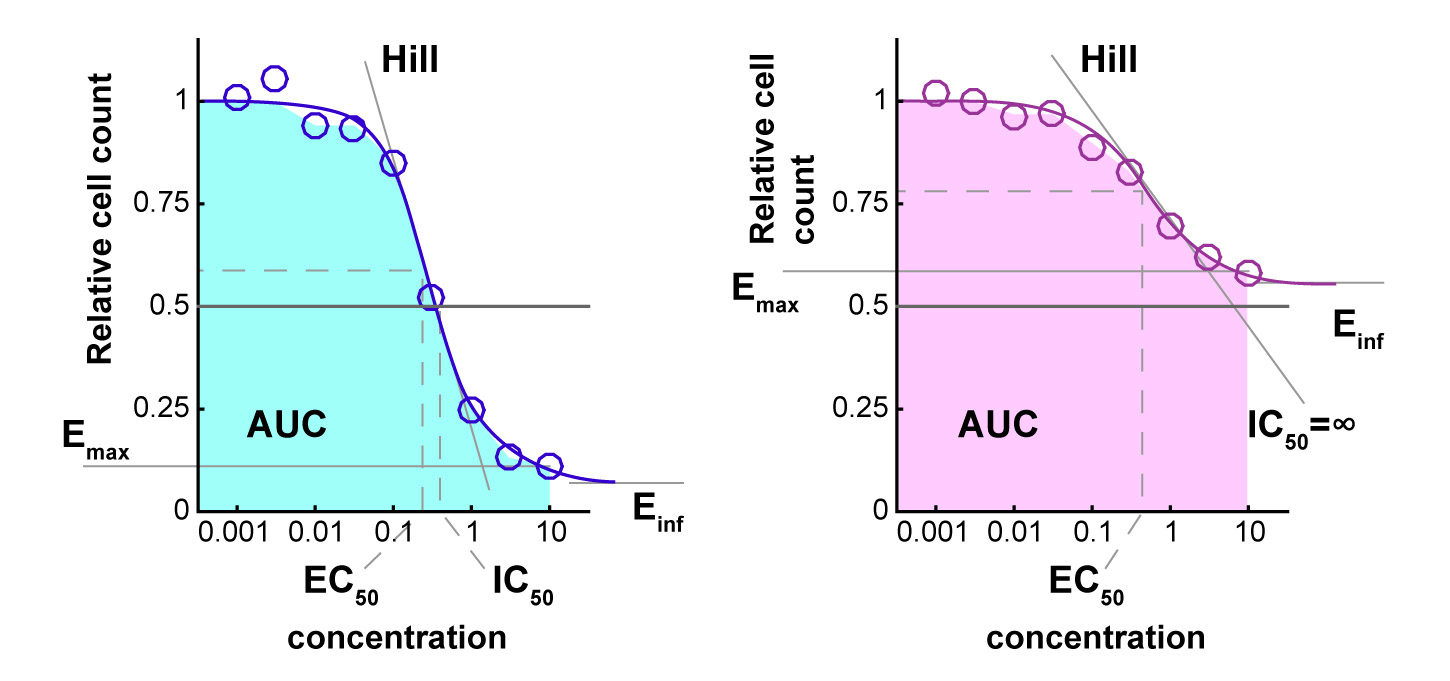

**Examples of dose-response curves based on relative cell count.** In the first example (left), a strong drug response results in an Einf close to 0 and a well-defined IC50. In the second (right), a partial response results in an Einf above 0.5 and an undefined IC50.

### **최종 연습 문제**

1. 현재 폴더에 있는 "multiple_example_negative_sample.csv" 파일을 Pandas 패키지를 사용해 읽어서 "df_drugs"라는 Dataframe을 생성하세요.
2. 결측값이 있는 데이터를 제거하세요. 차원의 변화를 확인하세요. (힌트: shape 속성과 dropna() 메서드 활용)
3. "% Inhibition 1"와 "% Inhibition 2"의 평균값을 갖는 "% Inhibition Avg" 컬럼을 생성하세요. (힌트: 메서드 인자로 "axis=1" 추가)
4. "multiple_example_negative_sample_avg.csv" 파일 이름으로 저장
5. "Drug 1"에 대한 데이터만 갖는 새로운 DataFrame 생성 ("df_drug1")
6. "Drug 1"에 대한 그래프 생성: 선그래프, x축-"Compound Conc", y축-"% Inhibition Avg"
```python
df_drug1.plot(x='<x축>', y='<y축>', kind='<그래프 타입>', marker='o', linestyle='-', color='b', label='% Inhibition Avg')
plt.xlabel('Compound Concentration')
plt.ylabel('% Inhibition Avg')
plt.title('Drug 1: Compound Concentration vs % Inhibition Avg')
plt.legend()
plt.grid(True)
plt.show()
```

7. Drug 1 ~ Drug 4에 IC50를 계산해서 표기 (힌트: Calculator 객체 생성 -> calculate_absolute_ic50 메서드 활용)
8. "ic50_results.csv" 파일 이름으로 IC50 결과 저장
9. Multi curve plot 그리기: (힌트: PlotCurve 객체 생성 -> multi_curve_plot 메서드 활용